In [1]:
%matplotlib inline
import sys
import numpy as np
import matplotlib.pyplot as plt
import torch
from time import time
import data_augs as rad

In [2]:
x = np.load('data_sample.npy',allow_pickle=True)
x = np.concatenate([x,x,x],1)
device = torch.device('cuda')
x = torch.from_numpy(x).float().to(device) / 255.
x.shape

torch.Size([128, 9, 84, 84])

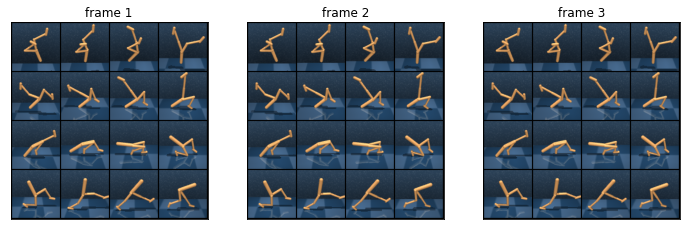

In [3]:
from torchvision.utils import make_grid

def show_stacked_imgs(x,max_display=16):
    
    fig=plt.figure(figsize=(12, 12))
    stack = 3
  
    for i in range(1, stack +1):
        grid = make_grid(x[:max_display,(i-1)*3:i*3,...],4).permute(1,2,0).cpu().numpy()
        
        fig.add_subplot(1, stack, i)
        plt.xticks([])
        plt.yticks([])
        plt.title('frame ' + str(i))
        plt.imshow(grid)


show_stacked_imgs(x)

# Random Crop

0.005596637725830078


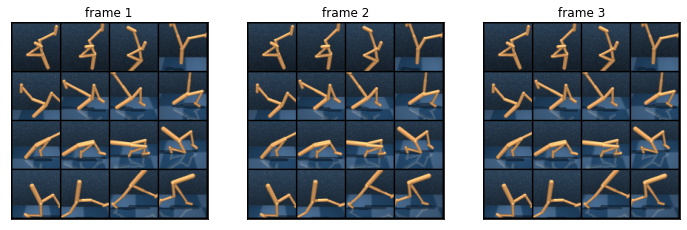

In [9]:
def random_crop(imgs, out=84):
    """
        args:
        imgs: np.array shape (B,C,H,W)
        out: output size (e.g. 84)
        returns np.array
    """
    #in_device = imgs.device
    #device = torch.device('cpu')
    
    
    #imgs = imgs.detach().cpu().numpy()
    n, c, h, w = imgs.shape
    crop_max = h - out + 1
    w1 = np.random.randint(0, crop_max, n)
    h1 = np.random.randint(0, crop_max, n)
    cropped = np.empty((n, c, out, out), dtype=imgs.dtype)
    for i, (img, w11, h11) in enumerate(zip(imgs, w1, h1)):
        
        cropped[i] = img[:, h11:h11 + out, w11:w11 + out]
    return imgs#torch.from_numpy(cropped).to(device)

x1 = x.detach().cpu().numpy()
start = time()
cropped_x = rad.random_crop(x1,64)
end = time()-start
print(end)
show_stacked_imgs(torch.from_numpy(cropped_x))


# Random Grayscale

Notes: inputs torch tensor (but can also be refactored to input numpy array). The reason is that matrix multiplication is much faster on GPU, which we need for calculating grayscale `imgs[:, :, 0, ...] * 0.2989 + imgs[:, :, 1, ...] * 0.587 + imgs[:, :, 2, ...] * 0.114 `.

CPU time 0.27018189430236816
GPU time 0.004532337188720703
GPU is 59.6X faster than CPU


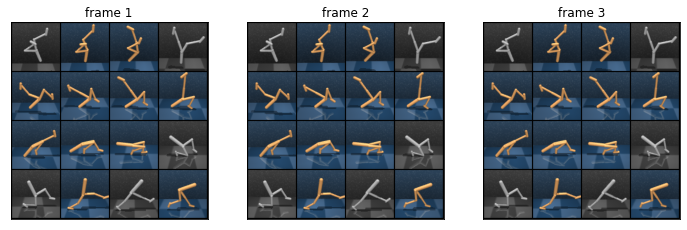

In [10]:

device = torch.device('cpu')
x = x.to(device)
start = time()
gray_x = rad.random_grayscale(x)
end = time()
cpu_time = end-start
print('CPU time',cpu_time)

device = torch.device('cuda')

x = x.to(device)
start = time()
gray_x = rad.random_grayscale(x)
end = time()
gpu_time = end-start
print('GPU time',gpu_time)

print('GPU is',str(round(cpu_time/gpu_time,1))+'X','faster than CPU')
show_stacked_imgs(gray_x)

# Random Cutout

Notes: inputs and outputs numpy array, quite fast on CPU.

0.013770341873168945
0.07795119285583496


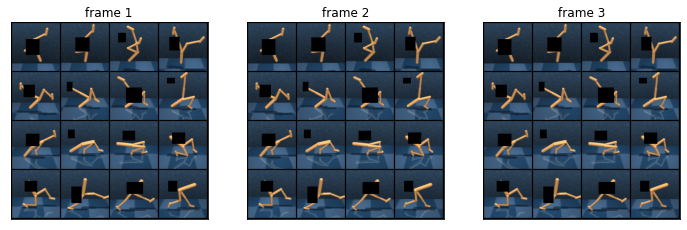

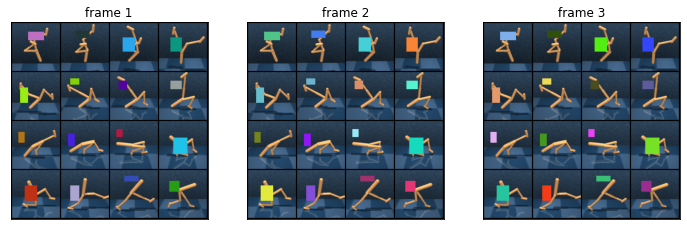

In [37]:

start = time()
cut_x = rad.random_cutout(x1)
end = time()-start
print(end)
show_stacked_imgs(torch.from_numpy(cut_x))


start = time()
cut_x = rad.random_cutout_color(x1)
end = time()-start
print(end)
show_stacked_imgs(torch.from_numpy(cut_x))



# Random Flip


CPU time 0.2765839099884033
GPU time 0.0006644725799560547
GPU is 416.2X faster than CPU


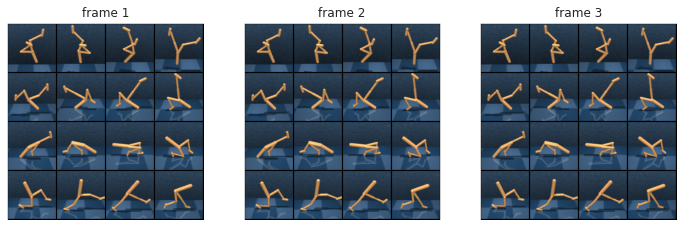

In [72]:


device = torch.device('cpu')
x = x.to(device)
start = time()
flipped_x = rad.random_flip(x)
end = time()
cpu_time = end-start
print('CPU time',cpu_time)

device = torch.device('cuda')
x = x.to(device)
start = time()
flipped_x = rad.random_flip(x)
end = time()
gpu_time = end-start
print('GPU time',gpu_time)

print('GPU is',str(round(cpu_time/gpu_time,1))+'X','faster than CPU')
show_stacked_imgs(flipped_x)

# Random Rotation

CPU time 0.34154582023620605
GPU time 0.014290332794189453
GPU is 23.9X faster than CPU


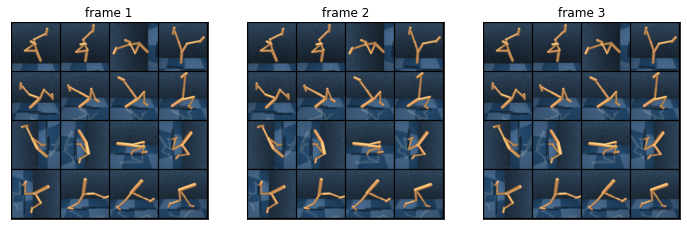

In [8]:

device = torch.device('cpu')

x = x.to(device)
start = time()
flipped_x = rad.random_rotation(x)
end = time()
cpu_time = end-start
print('CPU time',cpu_time)

device = torch.device('cuda')

x = x.to(device)
start = time()
flipped_x = rad.random_rotation(x)
end = time()
gpu_time = end-start
print('GPU time',gpu_time)

print('GPU is',str(round(cpu_time/gpu_time,1))+'X','faster than CPU')
show_stacked_imgs(flipped_x)

# Random Conv

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


CPU time 3.2991132736206055
GPU time 0.06035876274108887
GPU is 54.7X faster than CPU


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


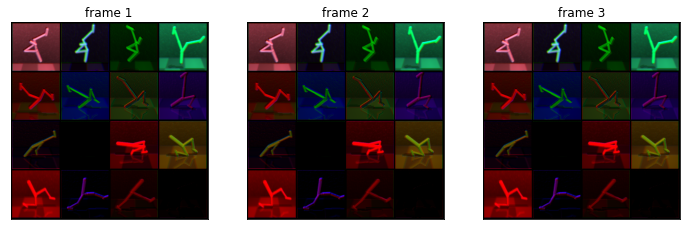

In [38]:
device = torch.device('cpu')
x=x.to(device)
start = time()
randconv_x = rad.random_convolution(x)
end = time()
cpu_time = end-start
print('CPU time',cpu_time)

device = torch.device('cuda')
x=x.to(device)
start = time()
start = time()
randconv_x = rad.random_convolution(x)
end = time()
gpu_time = end-start
print('GPU time',gpu_time)

print('GPU is',str(round(cpu_time/gpu_time,1))+'X','faster than CPU')
show_stacked_imgs(randconv_x.detach())

CPU time 1.7117204666137695
GPU time 0.06230425834655762
GPU is 27.5X faster than CPU


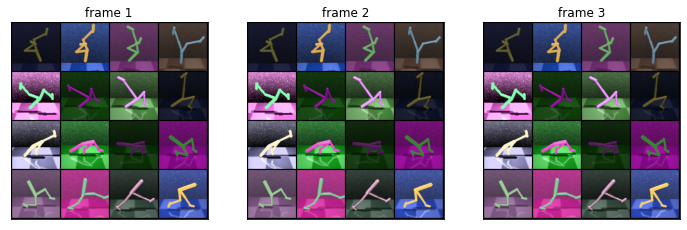

In [40]:
device = torch.device('cpu')
x=x.to(device)
start = time()
randconv_x = rad.random_color_jitter(x)
end = time()
cpu_time = end-start
print('CPU time',cpu_time)

device = torch.device('cuda')
x=x.to(device)
start = time()
start = time()
randconv_x = rad.random_color_jitter(x)
end = time()
gpu_time = end-start
print('GPU time',gpu_time)

print('GPU is',str(round(cpu_time/gpu_time,1))+'X','faster than CPU')
show_stacked_imgs(randconv_x.detach())

In [49]:
import seaborn as sns
filename = 'walker_ablations_040520.npy'

y = np.load(filename,allow_pickle=True)
d = y.item()

max_steps= [max(list(k.keys())) for k in d.values()]


d = y.item()
labels = []
step = 100000

means = []
stds = []
for k,v in d.items():
    if step in v:
        labels.append(k)
        data = v[step]
        means.append(data['mean_ep_reward'])
        stds.append(data['std_ep_reward'])
    


In [50]:
max_steps

[480000,
 200000,
 180000,
 100000,
 220000,
 180000,
 180000,
 160000,
 480000,
 480000,
 220000,
 140000,
 480000,
 100000,
 200000]

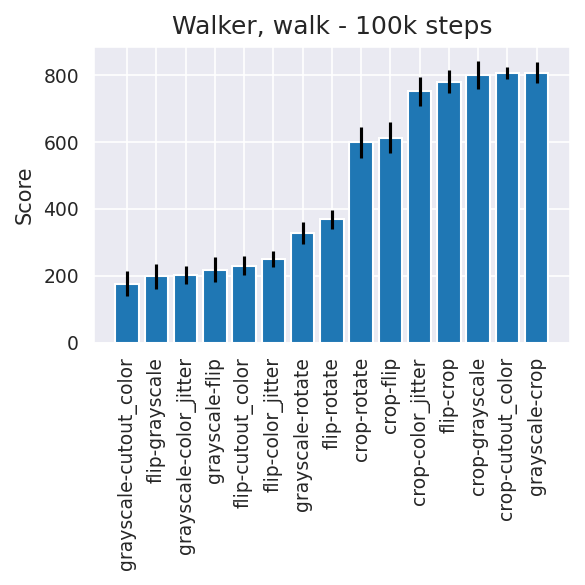

In [51]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150


labels = np.array(labels)
label_x = np.array(range(len(labels)))
means = np.array(means)
stds = np.array(stds)
sort_ids = np.argsort(means)

sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(4, 4))

ax.set_title('Walker, walk - '+str(step//1000) + 'k steps')
ax.set_ylabel('Score')

ax.set_xticks(label_x)
ax.set_xticklabels(labels[sort_ids])

ax.bar(label_x,means[sort_ids],label='RAD',yerr=stds[sort_ids]) #,color='#e74c3c'


plt.xticks(rotation=90)
ax.tick_params(axis='both', which='major', labelsize=9)

fig.tight_layout()

plt.show()

In [22]:
labels[sort_ids]

array(['grayscale-cutout_color', 'flip-grayscale',
       'grayscale-color_jitter', 'grayscale-flip', 'flip-cutout_color',
       'flip-color_jitter', 'grayscale-rotate', 'flip-rotate',
       'crop-rotate', 'crop-flip', 'flip-crop', 'grayscale-crop',
       'crop-color_jitter', 'crop-grayscale', 'crop-cutout_color'],
      dtype='<U22')

In [24]:
means[sort_ids][-1]

811.5497770400586

In [54]:
z = dict(a=1,b=2,c=3)



In [52]:
z

NameError: name 'z' is not defined